The aim of this project is to import data from a given DataDriven for a deteterminated period and make a prediction of the trend of one parameter based on a machine learning correlation, using different types of models.

In this first part of the code we show the procedure for data importation. Basically we had to select precise columns from our Dataset imported.

Data taken into account:
- Temperature of the building
- Lighting of the Building
- Data from exterior Piranometer

Period taken into account:
- 25/03/2012
- 31/03/2012

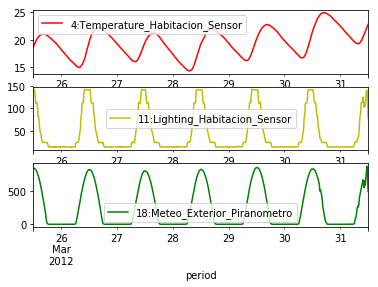

In [1]:
# -*- coding: utf-8 -*-

# FINAL_PROJECT

# De Vanna Guglielmo, Genco Federico, Riva Federico 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DataFolderPath = "/Users/Fede/Desktop/Final_project/DataSet"
FileName= "NEW-DATA-1.T15.txt"
FilePath = DataFolderPath+"/"+FileName

DataFrame = pd.read_csv(FilePath, sep= " ", index_col=11)
DataFrame["period"] = DataFrame["1:Date"].map(str) + " " + DataFrame["2:Time"].map(str)
DataFrame.index = DataFrame["period"]

previousIndex= DataFrame.index 
ParsedIndex= pd.to_datetime(previousIndex)
DataFrame.index= ParsedIndex

DF_myChosenDates = DataFrame["2012-03-25 12:00:00 ":"2012-03-31 12:00:00"]
DF_cleaned = DF_myChosenDates.dropna()
DF_cleaned.corr()

fig = plt.figure()

ax1= fig.add_subplot(3,1,1) 
ax2= fig.add_subplot(3,1,2)
ax3= fig.add_subplot(3,1,3)

DF_cleaned["4:Temperature_Habitacion_Sensor"].plot(ax=ax1,color = "r", legend = True)
DF_cleaned["11:Lighting_Habitacion_Sensor"].plot(ax=ax2,color = "y", legend = True)
DF_cleaned["18:Meteo_Exterior_Piranometro"].plot(ax=ax3,color = "g", legend = True)

plt.show()


From the plots we can se a correlation between data.

Now we create a copy of our dataset.
Then data are classified per period of time as shown in the table.


In [2]:
DF_FinalDataSet = DF_cleaned.copy() 

def lag_column(df,column_name,lag_period=1):
    for i in range(1,lag_period+1,1):
        new_column_name = column_name+"-"+str(i)+"hr"
        df[new_column_name] = df[column_name].shift(i)

    return df

DF_FinalDataSet= lag_column(DF_FinalDataSet,"4:Temperature_Habitacion_Sensor",24)
DF_FinalDataSet.dropna(inplace=True)
DF_FinalDataSet.index                
DF_FinalDataSet.index.hour

DF_FinalDataSet["hour"] = DF_FinalDataSet.index.hour              
DF_FinalDataSet["month"] = DF_FinalDataSet.index.month
DF_FinalDataSet["week_of_year"] = DF_FinalDataSet.index.week   

def weekendDetector(day):
    weekendLabel=0
    if (day== 5or day==6):
        weekendLabel=1
    else:
        weekendLabel=0
    return weekendLabel   
    
def dayDetector(hour):
    dayLabel=1
    if(hour<20 and hour>9):
        dayLabel=1 
    else:
        dayLabel=0
    return dayLabel      

DF_FinalDataSet["weekend"]= [weekendDetector(thisDay) for thisDay in DF_FinalDataSet.index.dayofweek]   
DF_FinalDataSet["day_night"]= [dayDetector(thisHour) for thisHour in DF_FinalDataSet.index.hour]     #adds more columns by appling the functions previously defined
DF_FinalDataSet.drop(DF_FinalDataSet.columns[[0,1,6,8,9,10,11,12,13,14,15,17,18,19,23]],axis=1,inplace=True);
DF_FinalDataSet.dropna(inplace=True)   

DF_FinalDataSet.head()

,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,8:Humedad_Comedor_Sensor,18:Meteo_Exterior_Piranometro,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week,4:Temperature_Habitacion_Sensor-1hr,...,4:Temperature_Habitacion_Sensor-20hr,4:Temperature_Habitacion_Sensor-21hr,4:Temperature_Habitacion_Sensor-22hr,4:Temperature_Habitacion_Sensor-23hr,4:Temperature_Habitacion_Sensor-24hr,hour,month,week_of_year,weekend,day_night
period,,,,,,,,,,,,,,,,,,,,,
2012-03-25 18:00:00,21.4787,20.7680,17.0000,206.187,45.7333,14.78800,19.1293,49.8320,7.0,20.8373,...,19.6933,19.4727,19.2273,18.9800,18.6780,18,3,12,1,1
2012-03-25 18:15:00,21.4053,20.7093,17.0000,207.104,46.1120,1.28800,18.8733,51.6507,7.0,20.7680,...,19.9093,19.6933,19.4727,19.2273,18.9800,18,3,12,1,1
2012-03-25 18:30:00,21.3000,20.6160,16.6667,206.837,46.7387,-3.96933,18.6447,53.7253,7.0,20.7093,...,20.0947,19.9093,19.6933,19.4727,19.2273,18,3,12,1,1
2012-03-25 18:45:00,21.1987,20.5533,16.5333,206.517,47.1547,-3.96933,18.3707,54.8400,7.0,20.6160,...,20.2620,20.0947,19.9093,19.6933,19.4727,18,3,12,1,1
2012-03-25 19:00:00,21.1027,20.4267,16.3333,207.979,47.6293,-3.77333,18.1453,56.0000,7.0,20.5533,...,20.4447,20.2620,20.0947,19.9093,19.6933,19,3,12,1,1


Here we have our inputs, from which we can start to build our model

In [3]:
DF_FinalDataSet.corr()

DF_target = DF_FinalDataSet["4:Temperature_Habitacion_Sensor"]
DF_features = DF_FinalDataSet.drop("4:Temperature_Habitacion_Sensor", axis = 1) 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(DF_features,DF_target,test_size=0.2,random_state=41234)


Now we can run our machine learning prediction with a linear regression model. In the charts are reported the line trend of the model and the line trend of the real data coming from out Dataset.


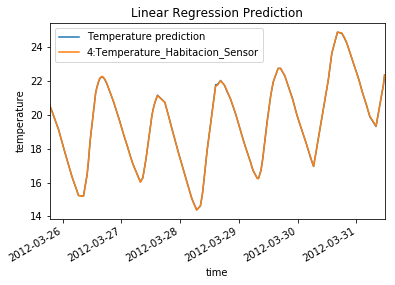

In [4]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()

linear_reg.fit(X_train,Y_train)
predict_linearReg_split = linear_reg.predict(X_test) 

Y_test.index

predict_DF_linearReg_split = pd.DataFrame(predict_linearReg_split,index = Y_test.index,columns = ["Temperature prediction"])
predict_DF_linearReg_split = predict_DF_linearReg_split.join(Y_test)
predict_DF_linearReg_split_ChosenDates = predict_DF_linearReg_split["2012-03-25":"2012-03-31"]
predict_DF_linearReg_split_ChosenDates.plot()

plt.xlabel("time")
plt.ylabel("temperature")
plt.title("Linear Regression Prediction")
plt.show()

With these lines of codes is possible to calculate the metrics relative to our problem.

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error_linearReg_split = mean_absolute_error(Y_test,predict_linearReg_split)
mean_squared_error_linearReg_split = mean_squared_error(Y_test,predict_linearReg_split)
R2_score_linearReg_split = r2_score(Y_test,predict_linearReg_split)

print mean_absolute_error_linearReg_split
print mean_squared_error_linearReg_split
print R2_score_linearReg_split

0.0207163331215
0.000676174259155
0.999899186832


In this different case, the prediction in evaluated with the cross validation method.

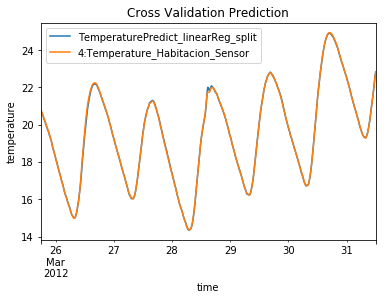

In [6]:
from sklearn.model_selection import cross_val_predict

predict_linearReg_CV = cross_val_predict(linear_reg,DF_features,DF_target,cv=10)
predict_DF_linearReg_CV = pd.DataFrame(predict_linearReg_CV,index = DF_target.index,columns = ["TemperaturePredict_linearReg_split"])
predict_DF_linearReg_CV = predict_DF_linearReg_CV.join(DF_target)
predict_DF_linearReg_CV_ChosenDates = predict_DF_linearReg_CV["2012-03-25 12:00:00 ":"2012-04-10 12:00:00"]
predict_DF_linearReg_CV_ChosenDates.plot()

plt.xlabel("time")
plt.ylabel("temperature")
plt.title("Cross Validation Prediction")
plt.show()


As before is possible to evaluate the metrics also for this model.

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error_linearReg_CV = mean_absolute_error(DF_target,predict_linearReg_CV)
mean_squared_error_linearReg_CV = mean_squared_error(DF_target,predict_linearReg_CV)
R2_score_linearReg_CV = r2_score(DF_target,predict_linearReg_CV)

print mean_absolute_error_linearReg_CV
print mean_squared_error_linearReg_CV
print R2_score_linearReg_CV

0.0325003269266
0.00257112486067
0.99959911285


The last method used is the random Forest regression.

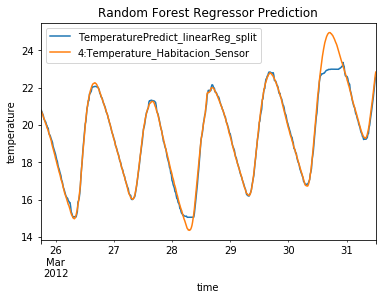

In [8]:
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor()

predict_RF_CV = cross_val_predict(reg_RF,DF_features,DF_target,cv=10)
predict_DF_RF_CV = pd.DataFrame(predict_RF_CV,index = DF_target.index,columns = ["TemperaturePredict_linearReg_split"])
predict_DF_RF_CV = predict_DF_RF_CV.join(DF_target)
predict_DF_RF_CV_ChosenDates = predict_DF_RF_CV["2012-03-25":"2012-03-31"]
predict_DF_RF_CV_ChosenDates.plot()

plt.xlabel("time")
plt.ylabel("temperature")
plt.title("Random Forest Regressor Prediction")
plt.show()

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error_linearReg_RF = mean_absolute_error(DF_target,predict_RF_CV)
mean_squared_error_linearReg_RF = mean_squared_error(DF_target,predict_RF_CV)
R2_score_linearReg_RF = r2_score(DF_target,predict_RF_CV)

print mean_absolute_error_linearReg_RF
print mean_squared_error_linearReg_RF
print R2_score_linearReg_RF

0.184816975071
0.15795928216
0.975371150816


In conclusion we can say that the best model we used is the linear regression one, considering the best metrics data obtained.